In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
%matplotlib inline 
from featurewiz import featurewiz

Imported featurewiz: advanced feature engg and selection library. Version=0.0.42
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


In [46]:
df=pd.read_csv("C:/Users/Admin/Downloads/Dataset.csv")

In [3]:
df.shape

(2481, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Timestamp                       2481 non-null   object 
 1   Lime_kiln_production_t/d        2481 non-null   float64
 2   Mud_flow_to_Filter_m3/h         2481 non-null   float64
 3   Density_mud_to_kiln_kg/m3       2481 non-null   float64
 4   Feed_zone_temperature_C         2481 non-null   float64
 5   ESP_inlet_temperature_C         2481 non-null   float64
 6   Calcination_zone_temperature_C  2481 non-null   float64
 7   LMD_feed_mud_temperature _C     2481 non-null   float64
 8   LMD_kiln_feed_temperature_C     2481 non-null   float64
 9   Esp_outlet_temperature_C        2481 non-null   float64
 10  Kiln_flame_temperature_C        2481 non-null   float64
 11  Bearing_fan_temperature_C       2481 non-null   float64
 12  Primary_air_temperature_C       24

In [5]:
df.head()

,Timestamp,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,Feed_zone_temperature_C,ESP_inlet_temperature_C,Calcination_zone_temperature_C,LMD_feed_mud_temperature _C,LMD_kiln_feed_temperature_C,Esp_outlet_temperature_C,...,IDF_bearing_temperature2_C,GN_to_kiln_nm3/h,Flow _nm3/h,O2_%,ESP_outlet_pressure_Pa,ESP_Diff_Pressure_pa,ESP_inlet_pressure_kPa,Burning_zone_pressure_Pa(G),Primary_air_pressure_Pa(G),GN_pressure_kPa(G)
0,24-08-16 00:00:00,798.667747,159.896639,1205.021608,502.068863,269.685021,746.318993,590.641734,415.707263,263.412758,...,44.113005,5042.171196,2396.877217,6.481069,-5029.683594,-2000,-4.927068,-34.905747,2883.768439,452.641449
1,24-08-16 00:30:00,798.449686,159.914889,1204.840400,501.889027,266.796239,737.006654,590.520355,415.753664,260.127347,...,43.924524,5025.550039,2306.910774,6.279912,-5029.683594,-2000,-4.939969,-35.112042,2868.067631,452.641449
2,24-08-16 01:00:00,798.231625,160.083309,1204.945270,502.103374,267.337429,718.110868,591.612307,414.413146,260.303590,...,43.736043,5008.928881,2450.513819,6.196669,-5029.683594,-2000,-4.952870,-35.883055,2923.644826,452.641449
3,24-08-16 01:30:00,798.013564,159.875902,1205.185474,502.358130,267.587721,724.973224,592.601287,413.454411,260.904727,...,43.547561,4993.424376,2611.431780,5.900719,-5029.683594,-2000,-4.965772,-34.664986,2908.512170,452.641449
4,24-08-16 02:00:00,797.795503,159.968484,1205.413424,502.612885,271.760741,737.208821,595.493488,411.233942,263.358234,...,43.359080,4989.879237,2559.687420,4.999143,-5029.683594,-2000,-4.974704,-33.810043,2903.507123,452.641449


In [6]:
df.describe()

,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,Feed_zone_temperature_C,ESP_inlet_temperature_C,Calcination_zone_temperature_C,LMD_feed_mud_temperature _C,LMD_kiln_feed_temperature_C,Esp_outlet_temperature_C,Kiln_flame_temperature_C,...,IDF_bearing_temperature2_C,GN_to_kiln_nm3/h,Flow _nm3/h,O2_%,ESP_outlet_pressure_Pa,ESP_Diff_Pressure_pa,ESP_inlet_pressure_kPa,Burning_zone_pressure_Pa(G),Primary_air_pressure_Pa(G),GN_pressure_kPa(G)
count,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,...,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.0,2481.000000,2481.000000,2481.000000,2481.000000
mean,763.698384,153.042463,1203.919253,526.602223,261.258759,737.449953,610.153335,517.442464,254.807284,732.127956,...,52.228119,4843.320170,1923.536289,5.907778,-4989.178443,-2000.0,-4.930894,-35.526869,2765.949968,450.521325
std,85.071428,15.657971,13.745480,42.598556,19.982922,43.478139,34.197208,53.376273,17.518384,42.985806,...,4.564801,491.757432,539.138060,1.738618,421.202822,0.0,0.462863,3.591255,156.419350,5.111619
min,0.003006,0.292285,1000.936325,186.421780,215.937545,227.127009,258.748224,173.917882,213.709003,686.068507,...,33.970470,68.317656,-67.709786,2.993772,-5078.791016,-2000.0,-5.138164,-44.773266,284.218750,446.960799
25%,767.579789,154.416023,1204.650117,496.668270,248.390971,716.873717,586.292801,482.204186,243.207780,692.117129,...,49.506543,4775.271049,1620.438241,5.116294,-5069.626953,-2000.0,-5.075025,-37.777696,2724.065353,449.125671
50%,786.182044,157.011516,1205.123545,526.660946,257.081758,738.964244,608.751622,523.622775,251.119236,717.768969,...,52.132231,4930.009813,1926.279847,5.470593,-5044.923828,-2000.0,-5.039853,-35.712784,2761.961021,449.887454
75%,795.772667,159.617170,1205.569823,556.190620,270.784311,760.979694,633.151591,552.220261,264.177947,768.063296,...,54.814288,5061.548752,2274.441845,6.000594,-5032.273438,-2000.0,-4.972461,-33.563178,2806.105251,450.645172
max,812.766609,161.178032,1222.878858,622.865814,353.269039,852.573100,697.883685,675.710935,331.243128,849.022345,...,70.812299,5481.654257,3648.082098,20.102736,36.868881,-2000.0,-0.120815,-8.758041,3504.999859,585.969753


<AxesSubplot:xlabel='ESP_Diff_Pressure_pa'>

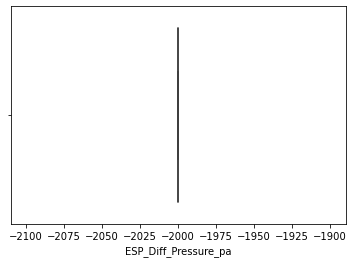

In [53]:
df[['ESP_Diff_Pressure_pa']]=df[['ESP_Diff_Pressure_pa']].astype(float)
sns.boxplot('ESP_Diff_Pressure_pa',data=df)

<AxesSubplot:xlabel='ESP_inlet_temperature_C'>

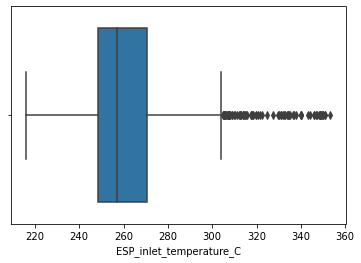

In [52]:
sns.boxplot('ESP_inlet_temperature_C',data=df)

<AxesSubplot:xlabel='Flow _nm3/h'>

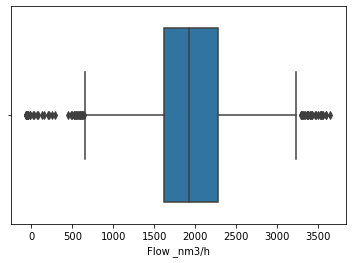

In [51]:
sns.boxplot('Flow _nm3/h',data=df)

<AxesSubplot:xlabel='IDF_bearing_temperature2_C'>

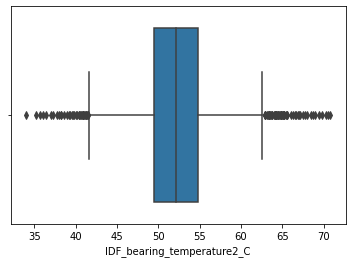

In [55]:
sns.boxplot('IDF_bearing_temperature2_C',data=df)

In [7]:
df.dropna(inplace = True)
df.reset_index(drop = True,inplace = True)

In [42]:
df.drop(['ESP_Diff_Pressure_pa','Timestamp'],axis=1,inplace=True)
df

,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,Feed_zone_temperature_C,ESP_inlet_temperature_C,Calcination_zone_temperature_C,LMD_feed_mud_temperature _C,LMD_kiln_feed_temperature_C,Esp_outlet_temperature_C,Kiln_flame_temperature_C,...,IDF_bearing_temperature_C,IDF_bearing_temperature2_C,GN_to_kiln_nm3/h,Flow _nm3/h,O2_%,ESP_outlet_pressure_Pa,ESP_inlet_pressure_kPa,Burning_zone_pressure_Pa(G),Primary_air_pressure_Pa(G),GN_pressure_kPa(G)
0,798.667747,159.896639,1205.021608,502.068863,269.685021,746.318993,590.641734,415.707263,263.412758,806.866767,...,48.849698,44.113005,5042.171196,2396.877217,6.481069,-5029.683594,-4.927068,-34.905747,2883.768439,452.641449
1,798.449686,159.914889,1204.840400,501.889027,266.796239,737.006654,590.520355,415.753664,260.127347,809.187064,...,49.538594,43.924524,5025.550039,2306.910774,6.279912,-5029.683594,-4.939969,-35.112042,2868.067631,452.641449
2,798.231625,160.083309,1204.945270,502.103374,267.337429,718.110868,591.612307,414.413146,260.303590,821.491469,...,50.227490,43.736043,5008.928881,2450.513819,6.196669,-5029.683594,-4.952870,-35.883055,2923.644826,452.641449
3,798.013564,159.875902,1205.185474,502.358130,267.587721,724.973224,592.601287,413.454411,260.904727,830.704369,...,50.916387,43.547561,4993.424376,2611.431780,5.900719,-5029.683594,-4.965772,-34.664986,2908.512170,452.641449
4,797.795503,159.968484,1205.413424,502.612885,271.760741,737.208821,595.493488,411.233942,263.358234,832.682633,...,51.605283,43.359080,4989.879237,2559.687420,4.999143,-5029.683594,-4.974704,-33.810043,2903.507123,452.641449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,805.179340,158.839048,1205.865704,518.194174,250.199807,800.164240,585.303597,412.658712,247.090915,703.005751,...,57.391629,53.839421,5037.826172,1899.216390,5.899122,-5052.992188,-5.033316,-38.486442,2768.294611,447.823273
2477,802.488867,158.792972,1205.623589,515.589438,249.908110,793.000562,584.585492,414.981009,246.396957,703.400545,...,57.592752,53.647787,5037.826172,1691.092324,6.028506,-5052.992188,-5.034819,-39.281534,2768.183025,447.823273
2478,799.798393,158.471010,1205.102027,514.448881,250.391824,767.159511,581.562052,409.265805,245.702999,696.143494,...,57.476724,53.456154,5037.826172,1786.470344,6.100906,-5052.992188,-5.036322,-38.877864,2757.873411,447.823273
2479,797.107920,158.044266,1205.179526,513.322408,249.169585,755.507199,581.913239,409.632506,245.009041,688.315620,...,57.284473,53.264521,5037.826172,1872.125848,6.002256,-5052.992188,-5.037825,-40.392731,2765.712822,447.823273


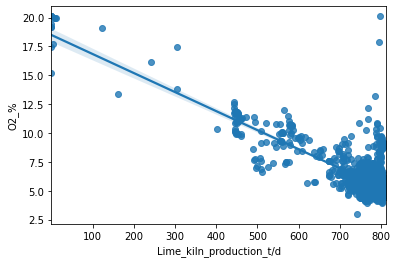

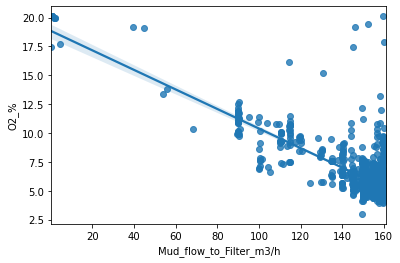

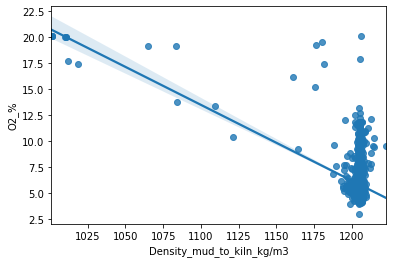

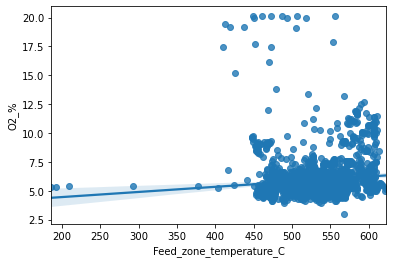

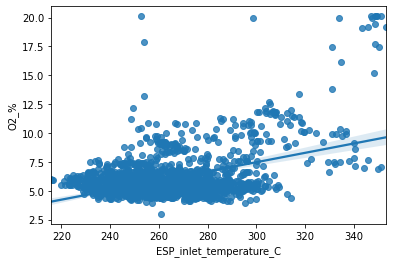

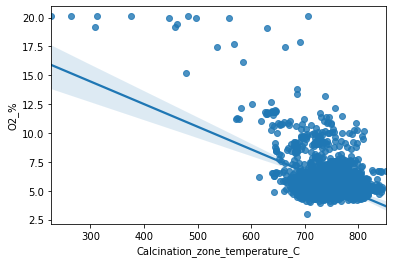

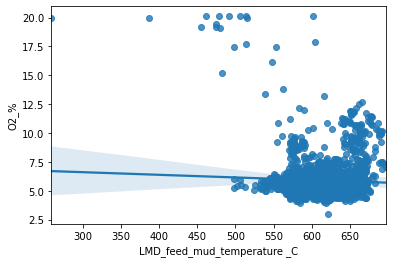

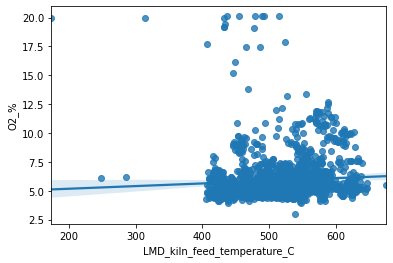

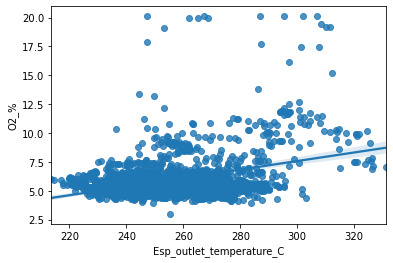

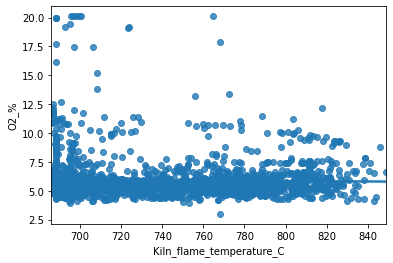

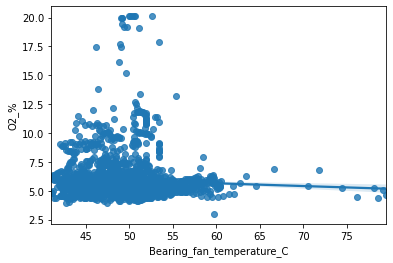

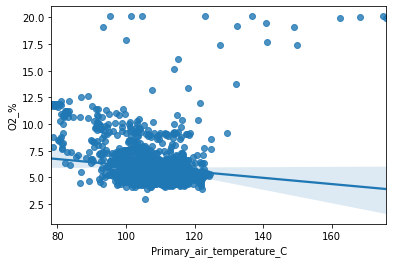

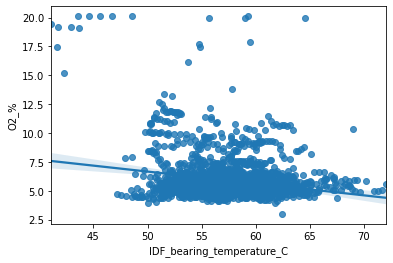

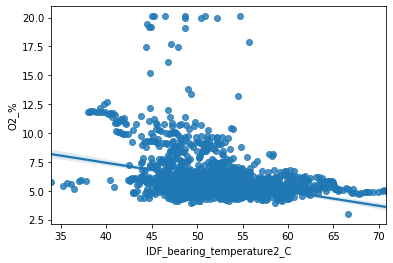

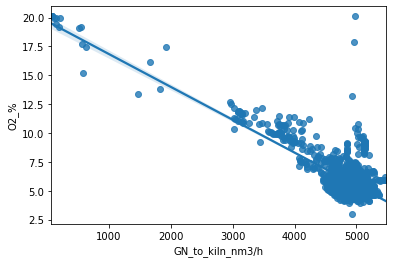

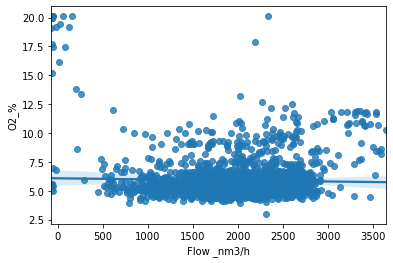

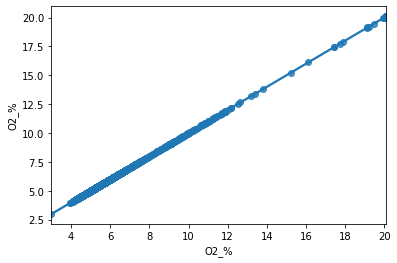

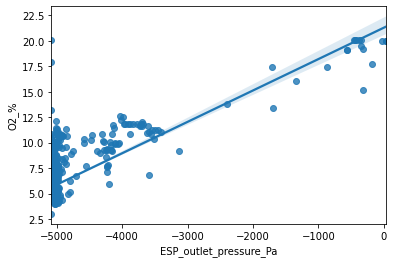

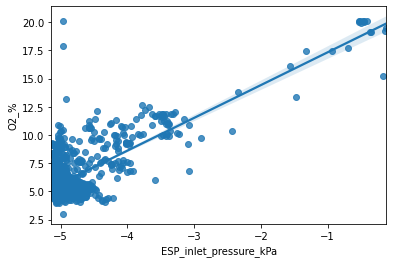

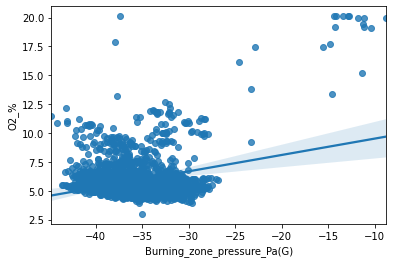

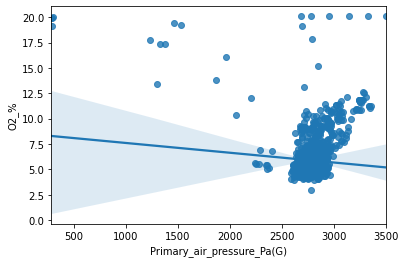

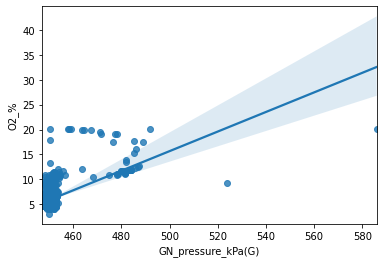

In [43]:
for i in df.columns:
    sns.regplot(x=i,y="O2_%",data=df)
    plt.show()

In [8]:
df[["ESP_Diff_Pressure_pa"]]=df[["ESP_Diff_Pressure_pa"]].astype(float)
X=df.drop("O2_%",axis=1)
y=df["O2_%"]

In [9]:
target="O2_%"

Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (2481, 24)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    23 Predictors classified...
        2 variable(s) will be ignored since they are ID or low-information variables
No GPU active on this device
    Running XGBoost using CPU parameters
Removing 2 columns from further processing since ID or low information variables
    columns removed: ['ESP_Diff_Pressure_pa', 'Timestamp']
    After removing redundant variables from further processing, features left = 21
#### Single_Label Regression Feature Selection Started ####
Searching for highly correlated variables from 21 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Var

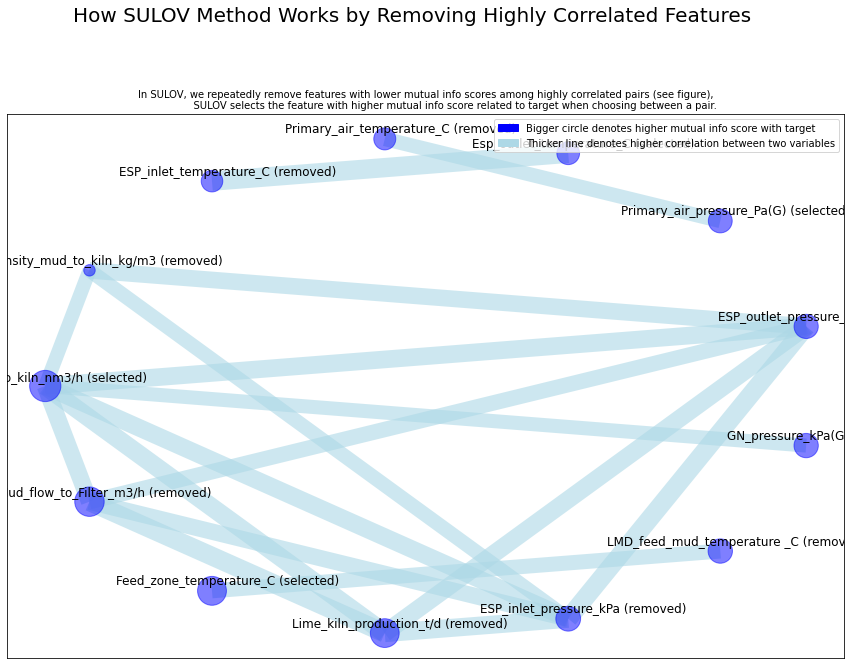

    Adding 0 categorical variables to reduced numeric variables  of 12
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 12 
    Finding Important Features using Boosted Trees algorithm...
        using 12 variables...
        using 10 variables...
        using 8 variables...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Selected 11 important features from your dataset
    Time taken (in seconds) = 7
Returning list of 11 important features and dataframe.


In [10]:
features, train = featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [11]:
print(features)

['GN_to_kiln_nm3/h', 'Burning_zone_pressure_Pa(G)', 'Primary_air_pressure_Pa(G)', 'Flow _nm3/h', 'Feed_zone_temperature_C', 'IDF_bearing_temperature_C', 'Bearing_fan_temperature_C', 'Calcination_zone_temperature_C', 'IDF_bearing_temperature2_C', 'Esp_outlet_temperature_C', 'Kiln_flame_temperature_C']


In [15]:
df_new=df[['Lime_kiln_production_t/d', 'Mud_flow_to_Filter_m3/h', 'Density_mud_to_kiln_kg/m3', 'ESP_inlet_temperature_C','Calcination_zone_temperature_C', 'ESP_outlet_pressure_Pa', 'ESP_inlet_pressure_kPa', 'GN_pressure_kPa(G)','GN_to_kiln_nm3/h', 'Burning_zone_pressure_Pa(G)', 'Primary_air_pressure_Pa(G)', 'Flow _nm3/h', 'Feed_zone_temperature_C', 'IDF_bearing_temperature_C', 'Bearing_fan_temperature_C', 'Calcination_zone_temperature_C', 'IDF_bearing_temperature2_C', 'Esp_outlet_temperature_C', 'Kiln_flame_temperature_C','O2_%']]

In [16]:
df_new

,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,ESP_inlet_temperature_C,Calcination_zone_temperature_C,ESP_outlet_pressure_Pa,ESP_inlet_pressure_kPa,GN_pressure_kPa(G),GN_to_kiln_nm3/h,Burning_zone_pressure_Pa(G),Primary_air_pressure_Pa(G),Flow _nm3/h,Feed_zone_temperature_C,IDF_bearing_temperature_C,Bearing_fan_temperature_C,Calcination_zone_temperature_C,IDF_bearing_temperature2_C,Esp_outlet_temperature_C,Kiln_flame_temperature_C,O2_%
0,798.667747,159.896639,1205.021608,269.685021,746.318993,-5029.683594,-4.927068,452.641449,5042.171196,-34.905747,2883.768439,2396.877217,502.068863,48.849698,41.612736,746.318993,44.113005,263.412758,806.866767,6.481069
1,798.449686,159.914889,1204.840400,266.796239,737.006654,-5029.683594,-4.939969,452.641449,5025.550039,-35.112042,2868.067631,2306.910774,501.889027,49.538594,41.517202,737.006654,43.924524,260.127347,809.187064,6.279912
2,798.231625,160.083309,1204.945270,267.337429,718.110868,-5029.683594,-4.952870,452.641449,5008.928881,-35.883055,2923.644826,2450.513819,502.103374,50.227490,41.421667,718.110868,43.736043,260.303590,821.491469,6.196669
3,798.013564,159.875902,1205.185474,267.587721,724.973224,-5029.683594,-4.965772,452.641449,4993.424376,-34.664986,2908.512170,2611.431780,502.358130,50.916387,41.326133,724.973224,43.547561,260.904727,830.704369,5.900719
4,797.795503,159.968484,1205.413424,271.760741,737.208821,-5029.683594,-4.974704,452.641449,4989.879237,-33.810043,2903.507123,2559.687420,502.612885,51.605283,41.230598,737.208821,43.359080,263.358234,832.682633,4.999143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,805.179340,158.839048,1205.865704,250.199807,800.164240,-5052.992188,-5.033316,447.823273,5037.826172,-38.486442,2768.294611,1899.216390,518.194174,57.391629,53.634812,800.164240,53.839421,247.090915,703.005751,5.899122
2477,802.488867,158.792972,1205.623589,249.908110,793.000562,-5052.992188,-5.034819,447.823273,5037.826172,-39.281534,2768.183025,1691.092324,515.589438,57.592752,53.539228,793.000562,53.647787,246.396957,703.400545,6.028506
2478,799.798393,158.471010,1205.102027,250.391824,767.159511,-5052.992188,-5.036322,447.823273,5037.826172,-38.877864,2757.873411,1786.470344,514.448881,57.476724,53.443666,767.159511,53.456154,245.702999,696.143494,6.100906
2479,797.107920,158.044266,1205.179526,249.169585,755.507199,-5052.992188,-5.037825,447.823273,5037.826172,-40.392731,2765.712822,1872.125848,513.322408,57.284473,53.348311,755.507199,53.264521,245.009041,688.315620,6.002256


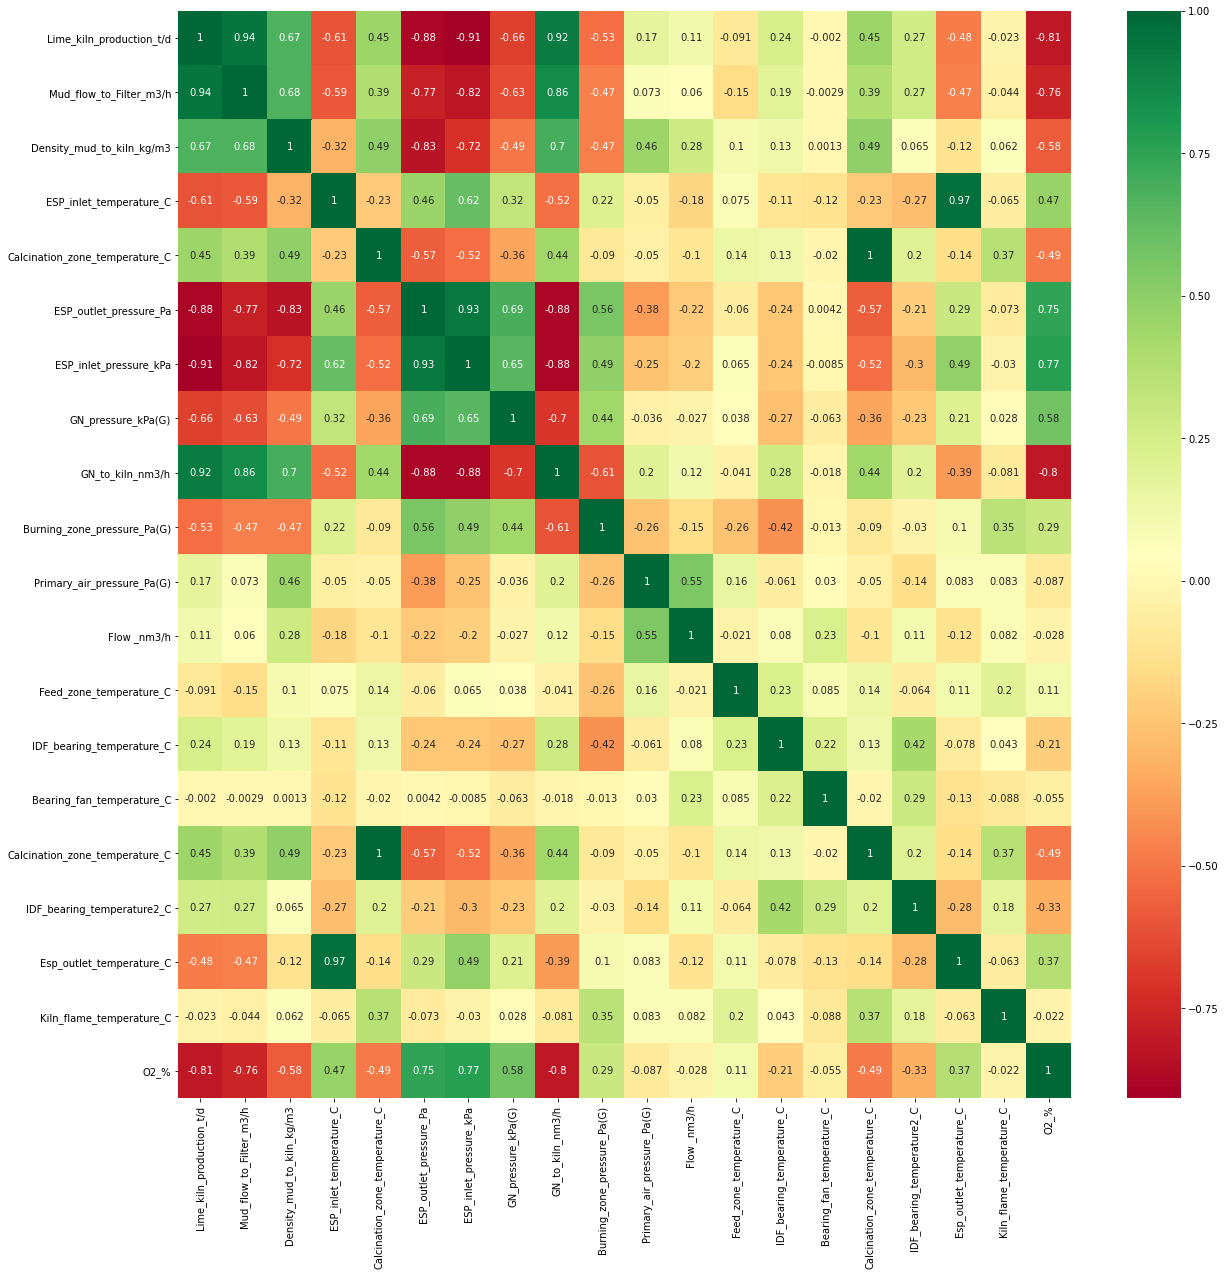

In [40]:
plt.figure(figsize=(20,20))
g=sns.heatmap(df_new.corr(),annot=True,cmap="RdYlGn")

In [17]:
X=df_new.drop("O2_%",axis=1)
Y=df_new[["O2_%"]]

In [18]:
x =  StandardScaler().fit_transform(X)

In [19]:
y=np.ravel(y)
y

array([6.48106859, 6.27991207, 6.19666914, ..., 6.10090626, 6.00225567,
       5.835135  ])

In [20]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x,y,test_size = 0.3,random_state=1)

In [21]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [22]:
predict=rf.predict(X_valid)

In [23]:
mse = mean_squared_error(Y_valid, predict)
print(mse)

0.25388954749526543


In [24]:
print(r2_score(Y_valid, predict))

0.9022315314376612


In [25]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [26]:
rf1=RandomForestRegressor()

In [27]:
rf_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [28]:
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 33.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [30]:
best_random = rf_random.best_estimator_

In [31]:
predict1=best_random.predict(X_valid)

In [57]:
mse = mean_squared_error(Y_valid, predict1)
print(mse)

0.21817748912748114


In [32]:
print(r2_score(Y_valid, predict1))

0.9159836267494709


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf2 = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [34]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 11.2min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [35]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [36]:
best_grid = grid_search.best_estimator_

In [37]:
predict3=best_grid.predict(X_valid)

In [38]:
print(r2_score(Y_valid, predict3))

0.869837224266478


In [56]:
mse = mean_squared_error(Y_valid, predict3)
print(mse)

0.33801253837417217
